## Change Point Detection

**Table of Contents**
* Section 1: changefinder (online)
    * Section 1.1: Constant variance
    * Section 1.2: Varying variance
* Section 2: Ruptures (offline)
    * Section 2.1: Constant variance
    * Section 2.2: Varying variance
    
Reference:
* [Accelerating Online Change-Point Detection Algorithm using 10GbE FPGA NIC](https://www.arc.ics.keio.ac.jp/~matutani/papers/iwata_heteropar2018.pdf)
* [Github](https://github.com/shunsukeaihara/changefinder/blob/master/changefinder/__init__.py)
    
### Section 1: changefinder (online)

In [281]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
# !pip install changefinder
import changefinder

### Section 1.1 constant variance

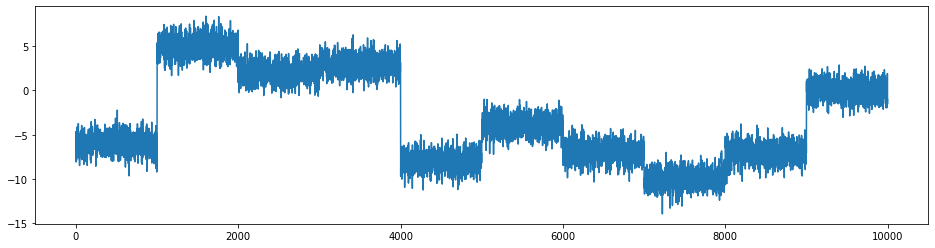

In [285]:
ts1 = []
mu, sigma, seg = 0.0, 1.0, 1000
for i in range(10):
    ts = np.random.normal(mu, sigma, seg) + np.random.randint(low=-10, high=10)
    ts1 = np.append(ts1,ts, axis=0)
    
plt.figure(figsize=(16,4))
plt.plot(ts1)

In [286]:
def findChangePoints(ts, ts_score, r, order, smooth):
    '''
       r: Discounting rate
       order: AR model order
       smooth: smoothing window size T
    '''
    cf = changefinder.ChangeFinder(r=r, order=order, smooth=smooth)
    ts_score = [cf.update(p) for p in ts]
    plt.figure(figsize=(16,4))
    plt.plot(ts)
    plt.figure(figsize=(16,4))
    plt.plot(ts_score, color='red')

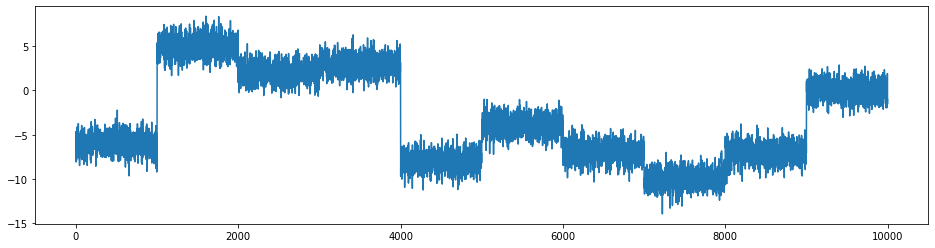

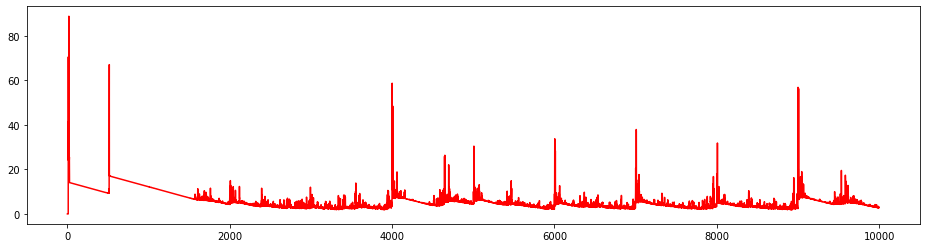

In [287]:
findChangePoints(ts1, ts_score1, r = 0.01, order = 3, smooth = 5)

In [288]:
ts_change_loc1 = pd.Series(ts_score1).nlargest(20)
ts_change_loc1 = ts_change_loc1.index
ts_change_loc1

Int64Index([ 580,   13,   11, 2001,  579,  581, 7001,  523,  522, 7008, 2008,
            4008, 7007, 3008, 2007, 3007, 3001, 4007, 8001, 8008],
           dtype='int64')

In [289]:
def plot_change_points(ts,ts_change_loc):
    plt.figure(figsize=(16,4))
    plt.plot(ts)
    for x in ts_change_loc:
        plt.axvline(x,lw=2, color='red')
        

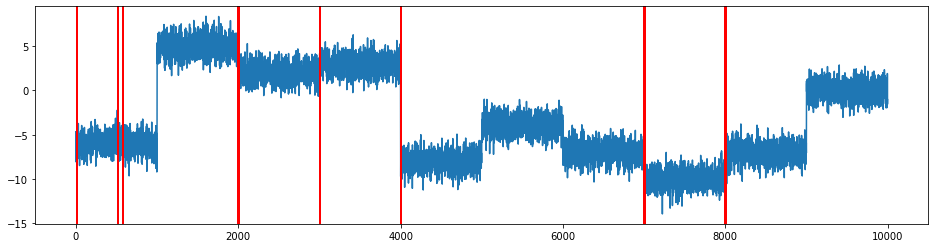

In [290]:
plot_change_points(ts1,ts_change_loc1)

### Section 2.2 varying variance

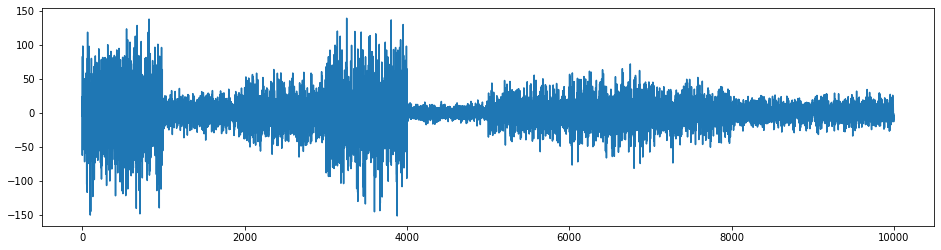

In [291]:
ts2 = []
mu, sigma, seg = 0.0, 1.0, 1000
for i in range(10):
    sig = np.random.randint(low=1, high=50)
    ts = np.random.normal(mu, sigma * sig, seg) 
    ts2 = np.append(ts2,ts, axis=0)
    
plt.figure(figsize=(16,4))
plt.plot(ts2)

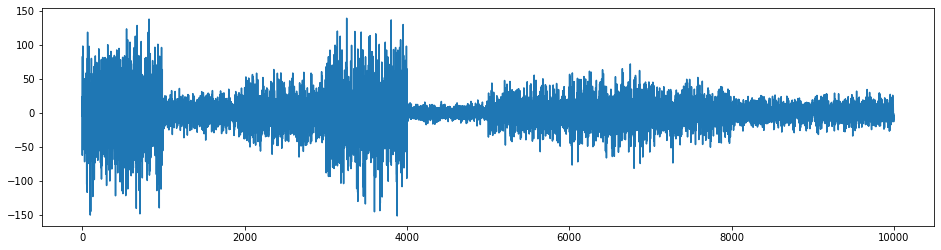

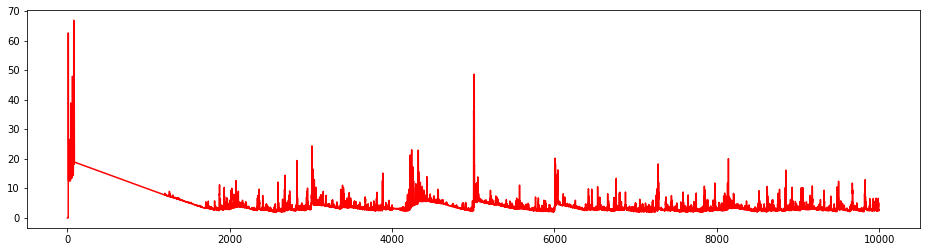

In [292]:
findChangePoints(ts2, ts_score2, r = 0.01,     order = 3,  smooth = 5)

In [293]:
ts_change_loc2 = pd.Series(ts_score2).nlargest(20)
ts_change_loc2 = ts_change_loc2.index

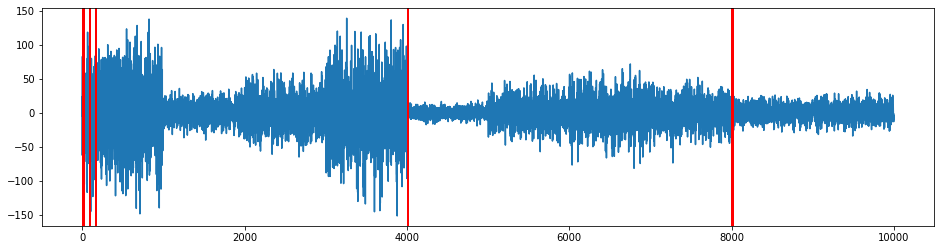

In [294]:
plot_change_points(ts2,ts_change_loc2)

### Section 2 changefinder (offline)
* [Ruptures github](https://github.com/deepcharles/ruptures)

### Section 2.1 constant variance

In [295]:
!pip install ruptures
import ruptures as rpt

In [296]:
# detection
algo1 = rpt.Pelt(model="rbf").fit(ts1)
change_location1 = algo1.predict(pen=10)
change_location1

[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

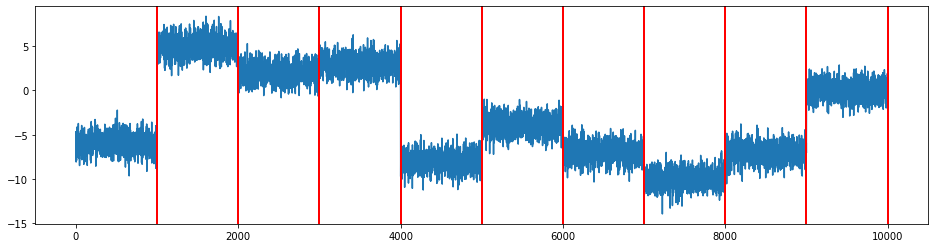

In [297]:
plot_change_points(ts1,change_location1)

### Section 2.2 Varying variance

In [ ]:
# detection
algo2 = rpt.Pelt(model="rbf").fit(ts2)
change_location2 = algo2.predict(pen=10)
change_location2

In [ ]:
plot_change_points(ts2,change_location2)